In [175]:
import yfinance as yf
import ta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [176]:
data = yf.Ticker("NKE")
# print(data) ## Prints a ticker object
# print(data.info)
# print("--------------------")
# print("--------------------")
# print(data.history(period='max')) ## must be of the format 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max, etc.

nke_df = pd.DataFrame(data.history(period='max'))
nke_df_filtered = nke_df[nke_df.index >= '2020-01-01']
nke_df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-02 00:00:00-05:00,0.125838,0.128573,0.125838,0.125838,100710400,0.0,0.0
1980-12-03 00:00:00-05:00,0.124469,0.124469,0.123102,0.123102,25177600,0.0,0.0
1980-12-04 00:00:00-05:00,0.127205,0.128573,0.127205,0.127205,22694400,0.0,0.0


In [177]:
nke_df['Intraday'] = nke_df['Close'] - nke_df['Open']
# Calculate Log Returns
nke_df['Log Return'] = np.log(nke_df['Close'] / nke_df['Close'].shift(1))
nke_df['Pct Change'] = nke_df['Close'].pct_change(periods=1)

nke_df_filtered['Intraday'] = nke_df_filtered['Close'] - nke_df_filtered['Open']
# Calculate Log Returns
nke_df_filtered['Log Return'] = np.log(nke_df_filtered['Close'] / nke_df_filtered['Close'].shift(1))
nke_df_filtered['Pct Change'] = nke_df_filtered['Close'].pct_change(periods=1)

nke_df_filtered.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intraday,Log Return,Pct Change
Date,,,,,,,,,,
2020-01-02 00:00:00-05:00,95.212937,96.011387,94.893553,96.001991,5644100,0.0,0.0,0.789054,NaN,NaN
2020-01-03 00:00:00-05:00,94.489633,95.814126,94.226615,95.738976,4541800,0.0,0.0,1.249343,-0.002743,-0.002740
2020-01-06 00:00:00-05:00,94.827783,95.663807,94.752640,95.654419,4612400,0.0,0.0,0.826636,-0.000884,-0.000883


In [178]:
## Some EDA
print(nke_df[['Close', 'Intraday','Volume']].describe())
print("-----------------------------")
print(nke_df_filtered[['Close', 'Intraday','Volume']].describe())

print("-----------------------------")
# Calculate variance and standard deviation
variance = nke_df_filtered['Close'].var()
standard_deviation = nke_df_filtered['Close'].std()

print(f"Variance of daily returns: {variance}")
print(f"Standard Deviation of daily returns: {standard_deviation}")

              Close      Intraday        Volume
count  11163.000000  11163.000000  1.116300e+04
mean      24.593059      0.001922  1.166159e+07
std       36.948026      0.596792  1.036674e+07
min        0.075229     -6.281964  0.000000e+00
25%        1.159458     -0.046783  6.184000e+06
50%        5.656408      0.000000  8.971200e+06
75%       33.061165      0.054820  1.359220e+07
max      169.295288      6.245201  1.574456e+08
-----------------------------
             Close     Intraday        Volume
count  1308.000000  1308.000000  1.308000e+03
mean    108.903514    -0.018444  8.337383e+06
std      24.078356     1.563014  6.073746e+06
min      59.155094    -6.281964  1.821900e+06
25%      91.768488    -0.936159  5.391525e+06
50%     104.790623     0.019041  6.975300e+06
75%     125.052698     0.923588  9.431150e+06
max     169.295288     6.245201  1.299670e+08
-----------------------------
Variance of daily returns: 579.7672252386621
Standard Deviation of daily returns: 24.078355949

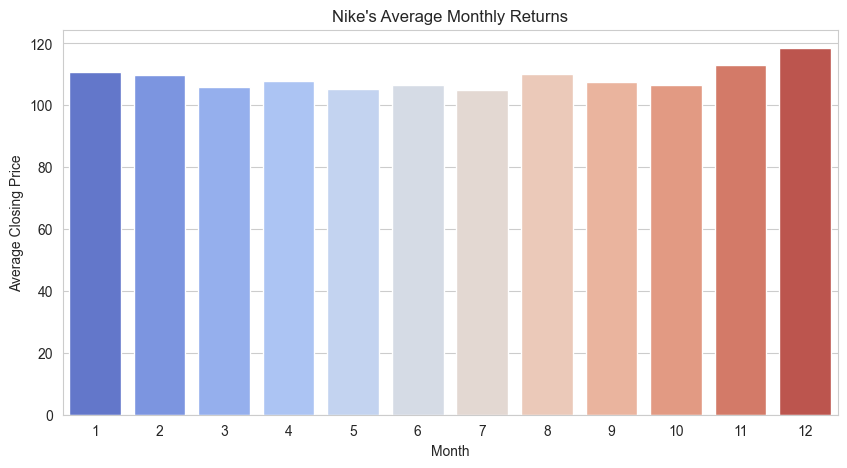

In [179]:
nke_df_filtered['Month'] = nke_df_filtered.index.month
monthly_avg = nke_df_filtered.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title("Nike's Average Monthly Returns")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.show()

In [ ]:
# Define bins (equal-width binning)
# The criteria for the split are based on the rank of the data. The first bin (label 0) will have the 10% of values that are the smallest, 
# the second bin (label 1) will have the next 10%, and so on, until the 10th bin (label 9) contains the largest 10% of values.

## Maybe look more into the bins (dates.... returns....?)

nke_df_filtered['Close_bin'] = pd.qcut(nke_df_filtered['Close'], q=10, labels=False)
print(nke_df_filtered.groupby('Close_bin')['Close'].describe())

##getting month
nke_df_filtered['Month'] = nke_df_filtered['Date'].dt.month

           count        mean       std         min         25%         50%  \
Close_bin                                                                    
0          131.0   73.739331  3.325942   59.155094   71.721989   74.150200   
1          131.0   82.529535  2.851349   78.054527   80.133678   82.138924   
2          131.0   91.462472  1.593043   88.230820   90.314499   91.778671   
3          130.0   96.963095  1.892586   93.954193   95.342089   96.788540   
4          131.0  102.598459  1.382950  100.068283  101.506203  102.734726   
5          131.0  107.953834  2.401930  104.792915  105.991730  107.293610   
6          130.0  117.833977  2.592950  113.173721  115.833984  117.950836   
7          131.0  124.928795  2.028617  121.734856  122.992802  125.050797   
8          131.0  134.171303  4.103986  128.275299  130.320404  133.995651   
9          131.0  156.831364  5.881735  143.325409  152.325203  157.542999   

                  75%         max  
Close_bin                  

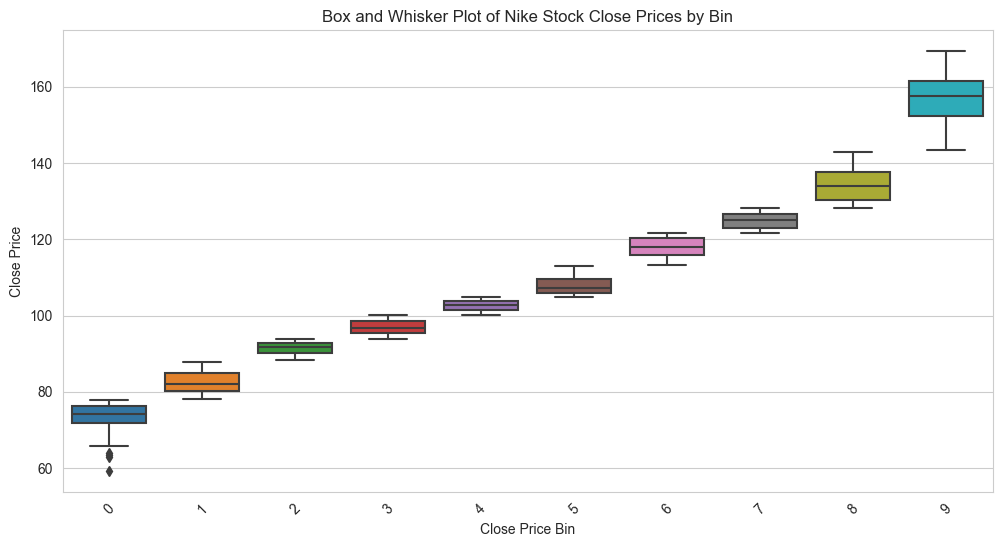

In [181]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=nke_df_filtered['Close_bin'], y=nke_df_filtered['Close'])

# Formatting the plot
plt.xlabel("Close Price Bin")
plt.ylabel("Close Price")
plt.title("Box and Whisker Plot of Nike Stock Close Prices by Bin")
plt.xticks(rotation=45)
plt.show()

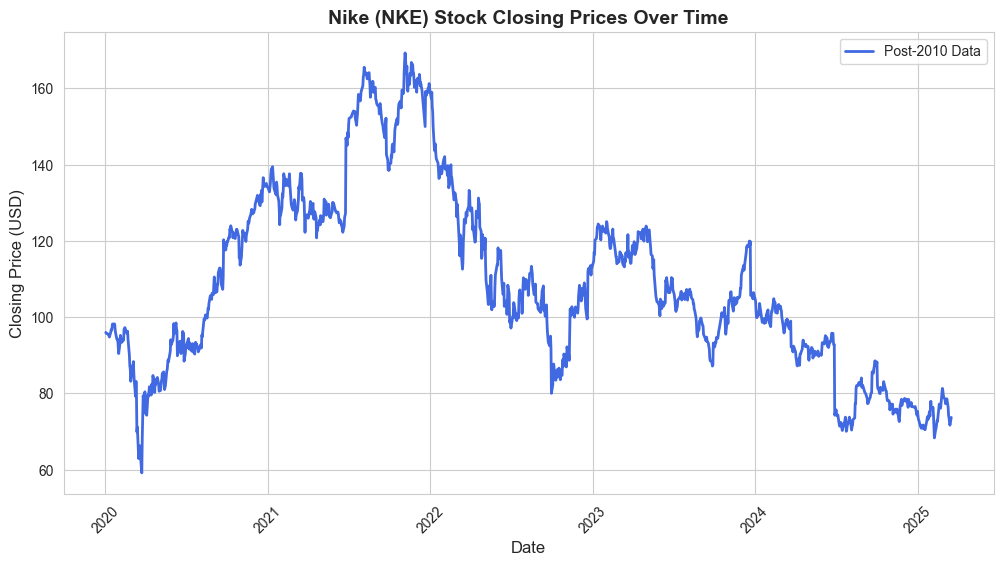

In [182]:
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")  # Options: "darkgrid", "white", "whitegrid", "ticks"

# Create the figure
plt.figure(figsize=(12, 6))

# # Plot the full stock closing prices
# sns.lineplot(data=nke_df, x=nke_df.index, y='Close', 
#              label='Full Data', color='gray', linewidth=1.5, alpha=0.5)

# Plot the filtered stock closing prices
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Close', 
             label='Post-2010 Data', color='royalblue', linewidth=2)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Nike (NKE) Stock Closing Prices Over Time', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.show()


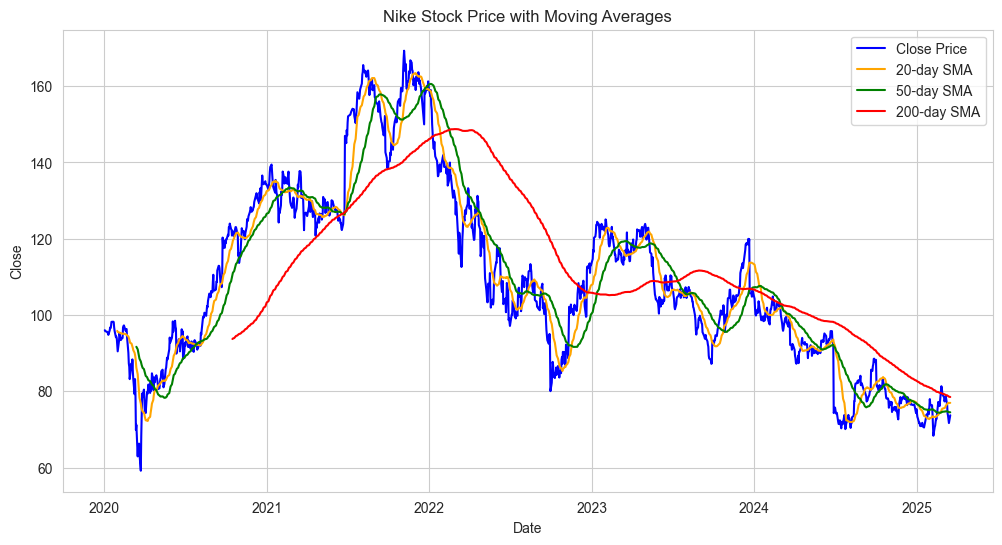

In [183]:
# Simple Moving Average (SMA)
nke_df_filtered['SMA_20'] = nke_df_filtered['Close'].rolling(window=20).mean()
nke_df_filtered['SMA_50'] = nke_df_filtered['Close'].rolling(window=50).mean()
nke_df_filtered['SMA_200'] = nke_df_filtered['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['Close'], label="Close Price", color="blue")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_20'], label="20-day SMA", color="orange")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_50'], label="50-day SMA", color="green")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_200'], label="200-day SMA", color="red")
plt.title("Nike Stock Price with Moving Averages")
plt.show()

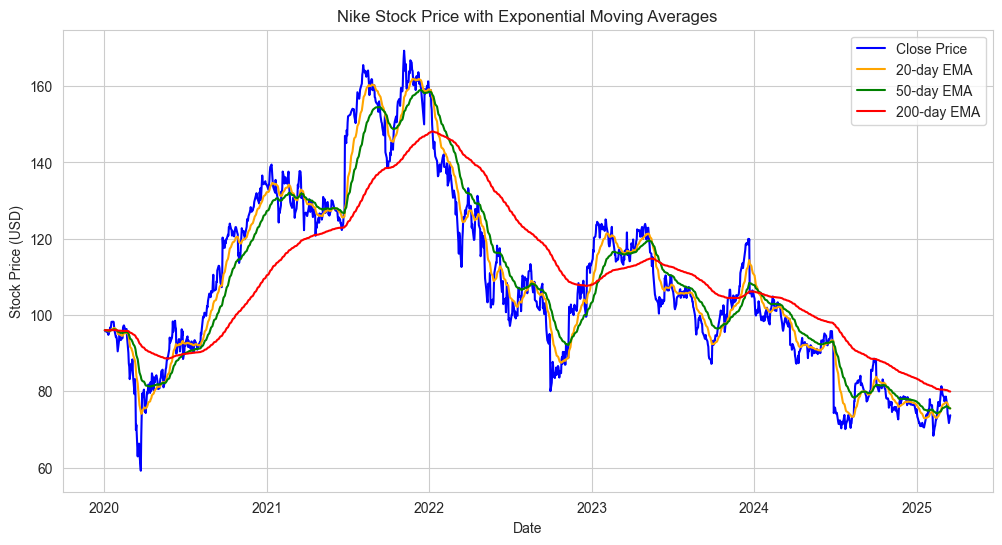

In [184]:
# Exponential Moving Averages (EMA)
nke_df_filtered['EMA_20'] = nke_df_filtered['Close'].ewm(span=20, adjust=False).mean()
nke_df_filtered['EMA_50'] = nke_df_filtered['Close'].ewm(span=50, adjust=False).mean()
nke_df_filtered['EMA_200'] = nke_df_filtered['Close'].ewm(span=200, adjust=False).mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['Close'], label="Close Price", color="blue")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['EMA_20'], label="20-day EMA", color="orange")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['EMA_50'], label="50-day EMA", color="green")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['EMA_200'], label="200-day EMA", color="red")
plt.title("Nike Stock Price with Exponential Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


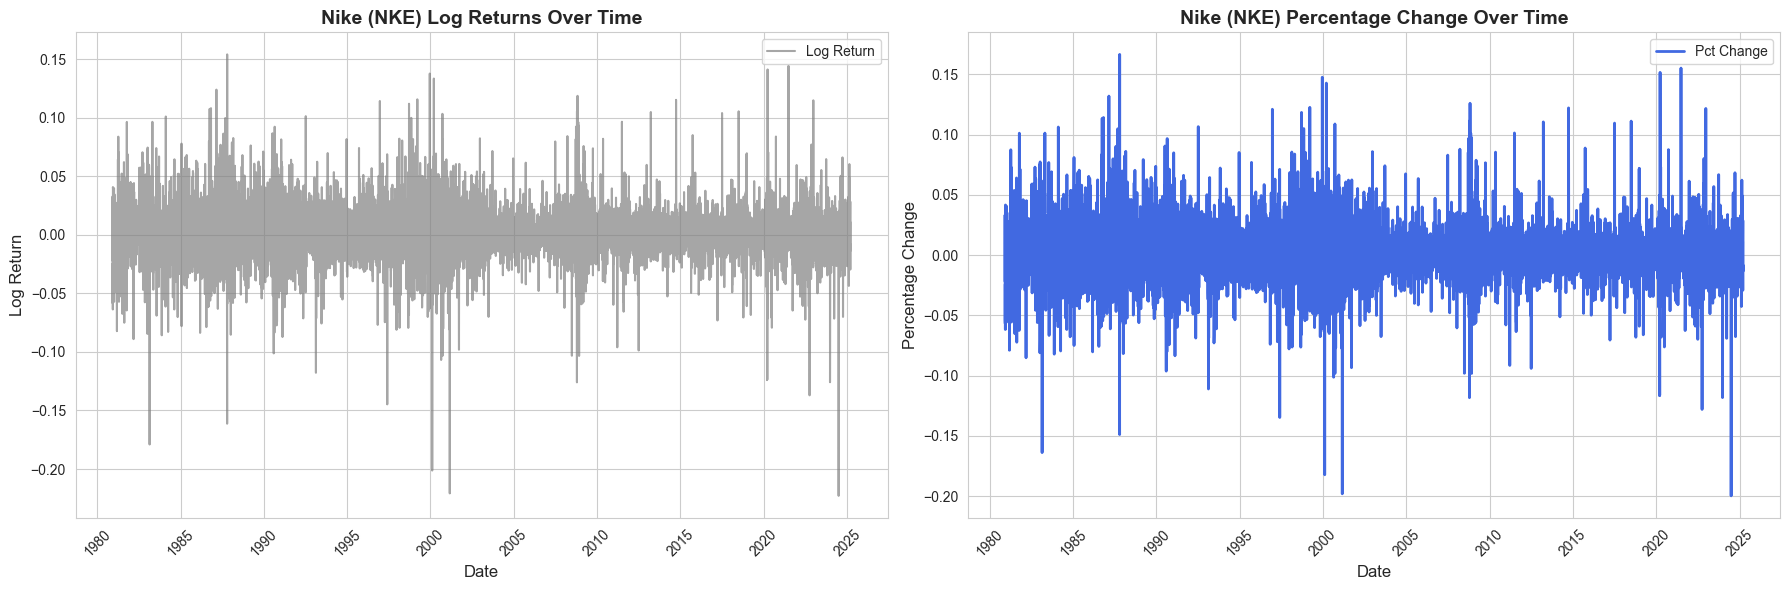

In [185]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Two side-by-side plots

# 🔹 Plot 1: Log Return Over Time
sns.lineplot(ax=axes[0], data=nke_df, x=nke_df.index, y='Log Return', 
             label='Log Return', color='gray', linewidth=1.5, alpha=0.7)
axes[0].set_title("Nike (NKE) Log Returns Over Time", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Date", fontsize=12)
axes[0].set_ylabel("Log Return", fontsize=12)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# 🔹 Plot 2: Percentage Change Over Time
sns.lineplot(ax=axes[1], data=nke_df, x=nke_df.index, y='Pct Change', 
             label='Pct Change', color='royalblue', linewidth=2)
axes[1].set_title("Nike (NKE) Percentage Change Over Time", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Date", fontsize=12)
axes[1].set_ylabel("Percentage Change", fontsize=12)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

In [186]:
# Find the top 5 log return gains (largest positive)
top_gains = nke_df_filtered.nlargest(5, 'Log Return')[['Log Return']]
top_gains_dates = top_gains.index

# Find the top 5 log return losses (largest negative)
top_losses = nke_df_filtered.nsmallest(5, 'Log Return')[['Log Return']]
top_losses_dates = top_losses.index

# Display results
print("Top 5 Log Return Gains:")
print(top_gains)

print("/n Top 5 Log Return Losses:")
print(top_losses)

Top 5 Log Return Gains:
                           Log Return
Date                                 
2021-06-25 00:00:00-04:00    0.144372
2020-03-24 00:00:00-04:00    0.141284
2022-12-21 00:00:00-05:00    0.114926
2020-03-25 00:00:00-04:00    0.088335
2020-09-23 00:00:00-04:00    0.083991
/n Top 5 Log Return Losses:
                           Log Return
Date                                 
2024-06-28 00:00:00-04:00   -0.222905
2022-09-30 00:00:00-04:00   -0.137059
2023-12-22 00:00:00-05:00   -0.125854
2020-03-12 00:00:00-04:00   -0.124053
2020-03-16 00:00:00-04:00   -0.123638


Text(0.5, 1.0, 'Distribution of Nike Log Returns')

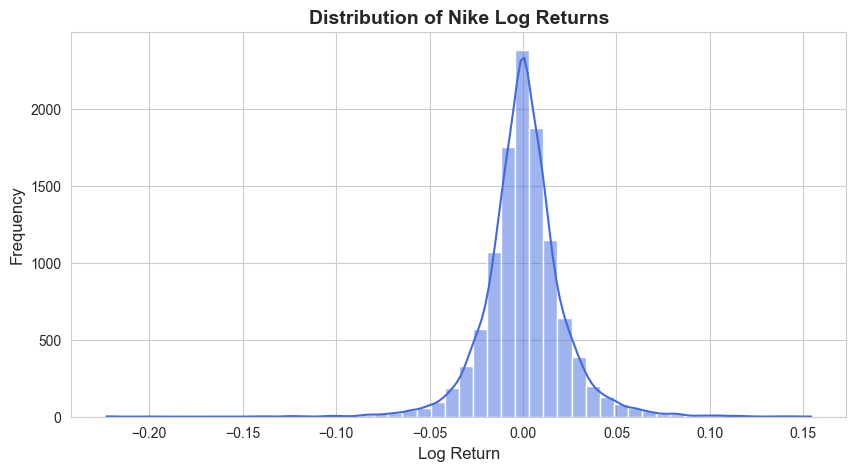

In [187]:
# Create histogram
plt.figure(figsize=(10, 5))
sns.histplot(nke_df['Log Return'], bins=50, kde=True, color="royalblue")

# Add labels and title
plt.xlabel("Log Return", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Nike Log Returns", fontsize=14, fontweight="bold")

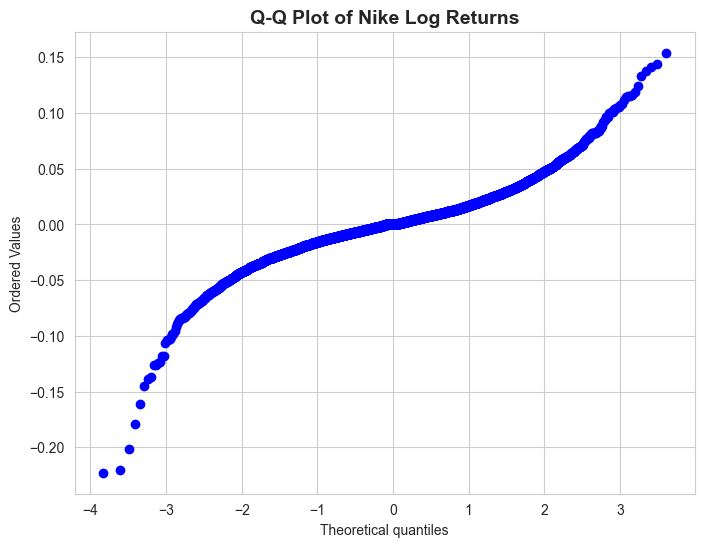

In [188]:
##Returns are NOT normally distrubuted
# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(nke_df['Log Return'], dist="norm", plot=plt)

# Add title
plt.title("Q-Q Plot of Nike Log Returns", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

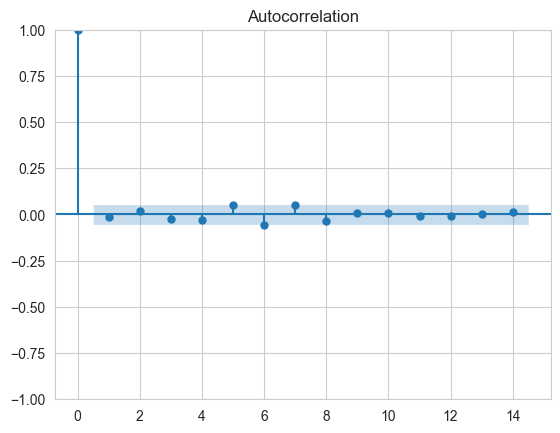

In [189]:

plot_acf(nke_df_filtered['Log Return'].dropna(), lags=14)
plt.show()

Text(0.5, 1.0, 'Nike (NKE) - Volume vs. Close Price')

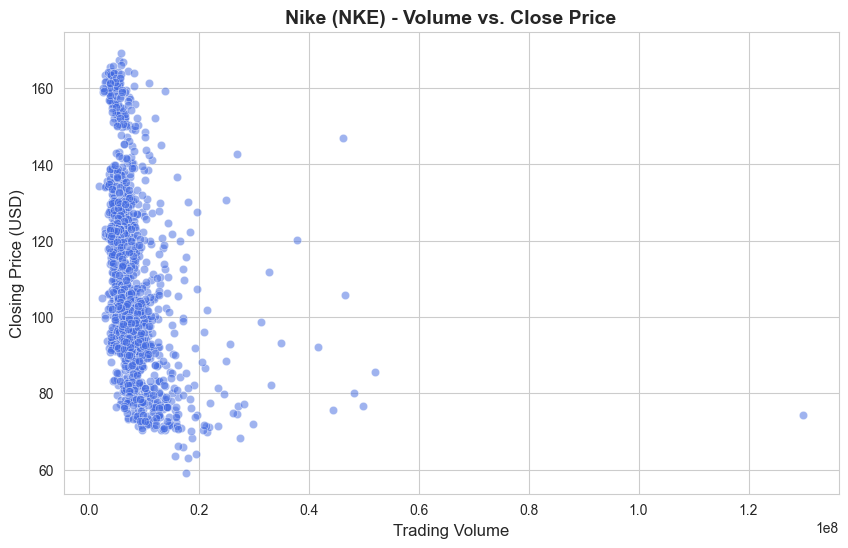

In [190]:
# Create figure
plt.figure(figsize=(10, 6))

# Scatterplot of Volume vs Close Price
sns.scatterplot(data=nke_df_filtered, x='Volume', y='Close', alpha=0.5, color='royalblue')

# Labels and title
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Nike (NKE) - Volume vs. Close Price', fontsize=14, fontweight='bold')

# Show plot

In [191]:
##Using the TA package

# Calculate RSI (Relative Strength Index) - to measure the speed and magnitude of price changes, helping identify potential overbought or oversold conditions in an asset. 
# Overbought: RSI readings above 70 typically suggest an asset is overbought and may be due for a price correction. 
# Oversold: RSI readings below 30 often indicate an asset is oversold and could be poised for a price rebound. 
# Neutral: A value of 50 suggests a balance between bullish and bearish positions. 
nke_df_filtered['RSI'] = ta.momentum.RSIIndicator(nke_df_filtered['Close'], window=14).rsi()

# Calculate MACD (Moving Average Convergence Divergence)
#analyzing the relationship between two exponential moving averages (EMAs) of a stock price, 
# with the MACD line representing the difference between these EMAs and the signal line representing a smoothed version of the MACD line
# MACD Line: Calculate the difference between the 12-period EMA and the 26-period EMA. 
# Signal Line: Calculate a 9-period EMA of the MACD line itself. 
macd_indicator = ta.trend.MACD(nke_df_filtered['Close'])
nke_df_filtered['MACD'] = macd_indicator.macd()
nke_df_filtered['MACD_Signal'] = macd_indicator.macd_signal()

# Calculate Bollinger Bands
# Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the pric
bollinger = ta.volatility.BollingerBands(nke_df_filtered['Close'], window=20, window_dev=2)
nke_df_filtered['Bollinger_Upper'] = bollinger.bollinger_hband()
nke_df_filtered['Bollinger_Lower'] = bollinger.bollinger_lband()
nke_df_filtered['Bollinger_Middle'] = bollinger.bollinger_mavg()

# Display first few rows
nke_df_filtered[['Close', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']].head(3)

,Close,RSI,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower
Date,,,,,,
2020-01-02 00:00:00-05:00,96.001991,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,95.738976,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,95.654419,NaN,NaN,NaN,NaN,NaN


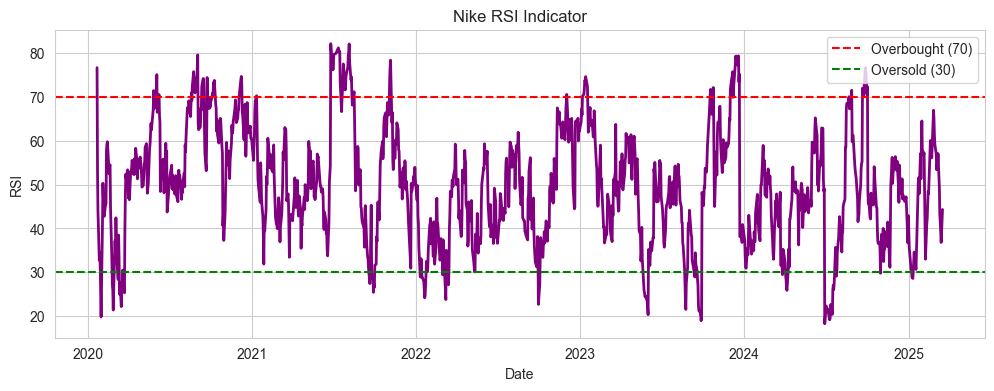

In [192]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='RSI', color='purple', linewidth=2)
plt.axhline(70, color='red', linestyle='dashed', label="Overbought (70)")
plt.axhline(30, color='green', linestyle='dashed', label="Oversold (30)")
plt.title('Nike RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

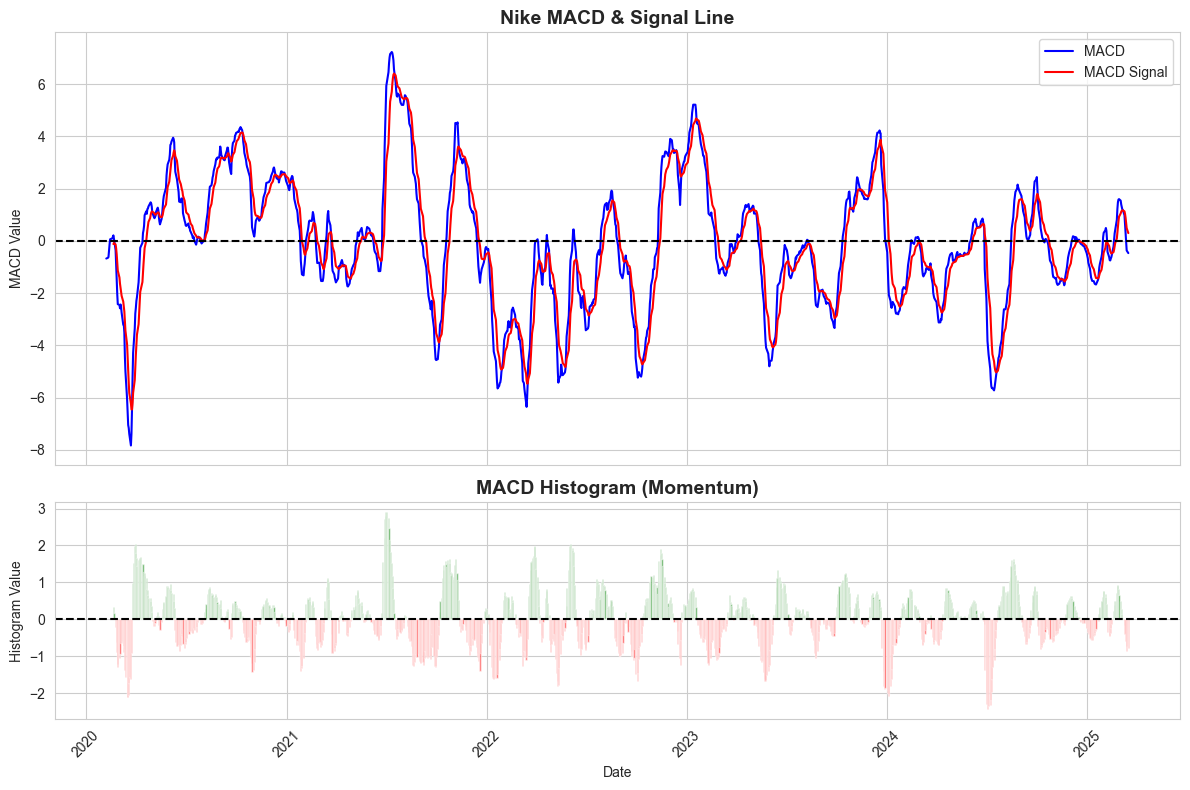

In [193]:
# Create figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# 🔹 Subplot 1: MACD & Signal Line
sns.lineplot(ax=axes[0], data=nke_df_filtered, x=nke_df_filtered.index, y='MACD', label='MACD', color='blue')
sns.lineplot(ax=axes[0], data=nke_df_filtered, x=nke_df_filtered.index, y='MACD_Signal', label='MACD Signal', color='red')

axes[0].axhline(0, color='black', linestyle='dashed')
axes[0].set_title('Nike MACD & Signal Line', fontsize=14, fontweight='bold')
axes[0].set_ylabel('MACD Value')
axes[0].legend()

# 🔹 Subplot 2: MACD Histogram
nke_df_filtered['MACD_Histogram'] = nke_df_filtered['MACD'] - nke_df_filtered['MACD_Signal']
axes[1].bar(nke_df_filtered.index, nke_df_filtered['MACD_Histogram'], 
            color=['green' if v >= 0 else 'red' for v in nke_df_filtered['MACD_Histogram']], 
            alpha=0.6, width=2)

axes[1].axhline(0, color='black', linestyle='dashed')
axes[1].set_title('MACD Histogram (Momentum)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Histogram Value')
axes[1].set_xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

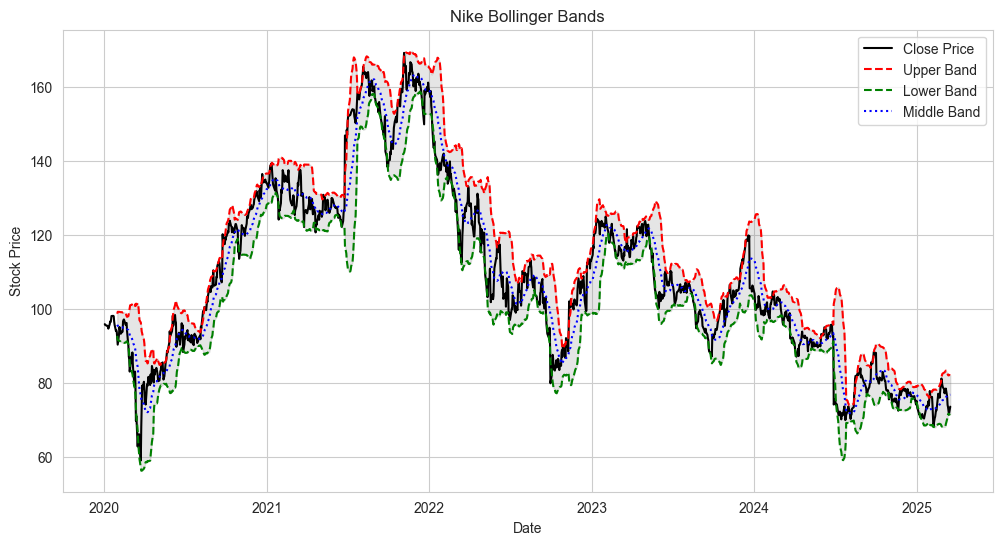

In [194]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Close', label='Close Price', color='black')
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Bollinger_Upper', label='Upper Band', color='red', linestyle='dashed')
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Bollinger_Lower', label='Lower Band', color='green', linestyle='dashed')
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Bollinger_Middle', label='Middle Band', color='blue', linestyle='dotted')
plt.fill_between(nke_df_filtered.index, nke_df_filtered['Bollinger_Lower'], nke_df_filtered['Bollinger_Upper'], color='gray', alpha=0.2)
plt.title('Nike Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          1.338e+04
Date:                Mon, 17 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:29:55   Log-Likelihood:                         -6016.1
No. Observations:                1308   AIC:                                  1.204e+04
Df Residuals:                    1306   BIC:                                  1.205e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

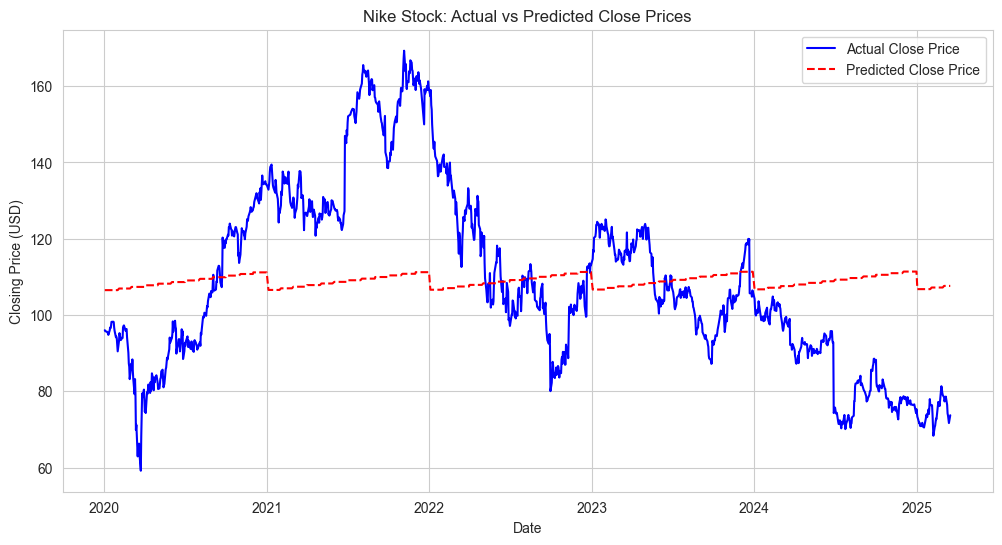

In [195]:
# Linear Regression (Closing Price)
nke_model_df = nke_df_filtered.copy()

nke_model_df['year'] = nke_model_df.index.year
nke_model_df['month'] = nke_model_df.index.month
nke_model_df['day'] = nke_model_df.index.day

X = nke_model_df[['year', 'month']]
y = nke_model_df['Close']

model = sm.OLS(y, X).fit()
print(model.summary())

# Predict values
nke_model_df['Predicted_Close'] = model.predict(X)

# Plot actual vs. predicted close prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=nke_model_df.index, y=nke_model_df['Close'], label="Actual Close Price", color="blue")
sns.lineplot(x=nke_model_df.index, y=nke_model_df['Predicted_Close'], label="Predicted Close Price", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Nike Stock: Actual vs Predicted Close Prices")
plt.legend()
plt.show()


                                 OLS Regression Results                                
Dep. Variable:             Log Return   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.639
Date:                Mon, 17 Mar 2025   Prob (F-statistic):                       0.195
Time:                        20:29:56   Log-Likelihood:                          3137.8
No. Observations:                1308   AIC:                                     -6272.
Df Residuals:                    1306   BIC:                                     -6261.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

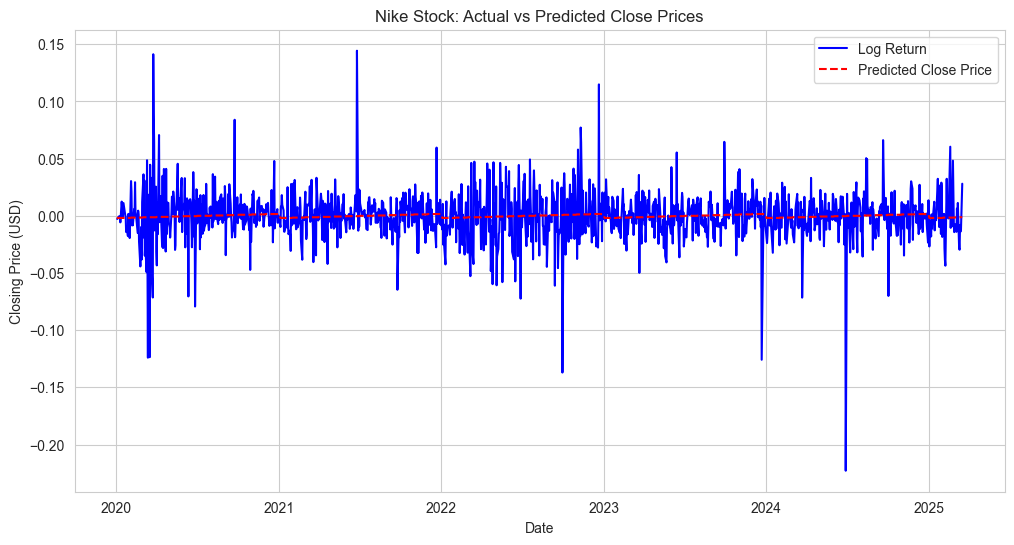

In [196]:
# Linear Regression (Log Return)
nke_model_df = nke_df_filtered.copy()

nke_model_df['year'] = nke_model_df.index.year
nke_model_df['month'] = nke_model_df.index.month
nke_model_df['day'] = nke_model_df.index.day

X = nke_model_df[['year', 'month']]
y = nke_model_df['Log Return']
y = y.fillna(0)

model = sm.OLS(y, X).fit()
print(model.summary())

# Predict values
nke_model_df['Predicted_Log'] = model.predict(X)

# Plot actual vs. predicted close prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=nke_model_df.index, y=nke_model_df['Log Return'], label="Log Return", color="blue")
sns.lineplot(x=nke_model_df.index, y=nke_model_df['Predicted_Log'], label="Predicted Close Price", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Nike Stock: Actual vs Predicted Close Prices")
plt.legend()
plt.show()

2024-03-17 00:00:00-04:00


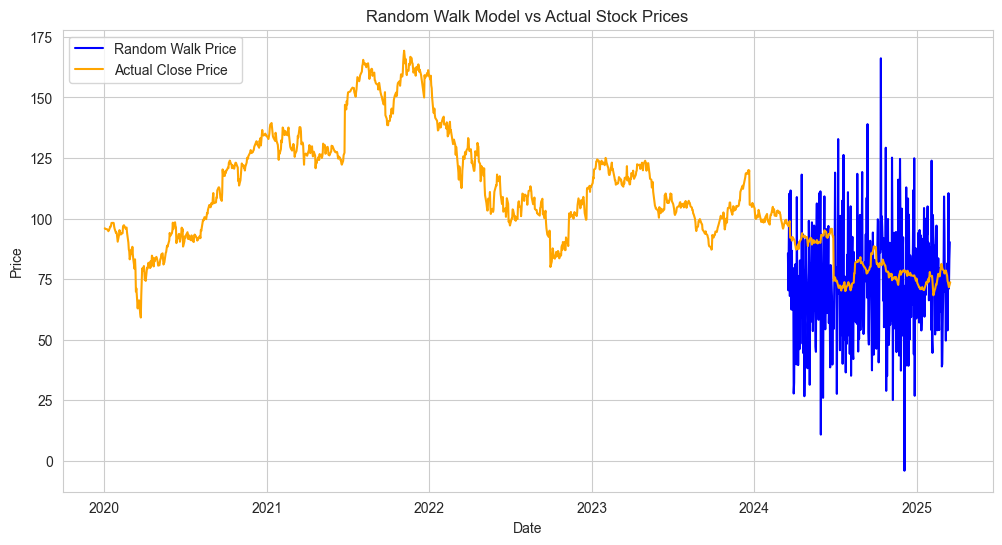

In [197]:
# Naive Random Walk
np.random.seed(42)

n_steps = 365
last_price = nke_model_df['Close'].iloc[-1]
last_date = nke_model_df.index[-1]
new_date = last_date - pd.Timedelta(days=n_steps)
print(new_date)

mu = 0  # Mean return (0 for pure random walk)
sigma = 24  # Standard deviation of returns

closes = np.random.normal(mu, sigma, n_steps)
closes = closes + last_price

dates = pd.date_range(start=new_date, periods=n_steps, freq='D')
random_walk_df = pd.DataFrame({'Date': dates, 'Price': closes})
random_walk_df.set_index('Date', inplace=True)


## Plot 
plt.figure(figsize=(12, 6))

# Plot the Random Walk Model
plt.plot(random_walk_df, label='Random Walk Price', color='blue')

# Plot the Actual Close Price
sns.lineplot(x=nke_model_df.index, y=nke_model_df['Close'], label="Actual Close Price", color="orange")

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Random Walk Model vs Actual Stock Prices')

# Adding the legend to the plot
plt.legend()

# Show the plot
plt.show()

